<a href="https://colab.research.google.com/github/aaanishaaa/IBM_quantumcomputing/blob/main/Introduction_to_Qiskit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Qiskit

In [2]:
!pip install qiskit
!pip install qiskit_aer
!pip install qiskit['visualization']

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=37e184f63703febea9687c16dcdd4c89a70da9cc7201fa19777ca70c0e746991
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


##A quick recap

1. **Qubits:** Can be described as *normalized* column vector:  
   $$
   |0\rangle = \begin{bmatrix} 1\\ 0 \end{bmatrix}, \quad
   |1\rangle = \begin{bmatrix} 0\\ 1 \end{bmatrix}, \quad
   |\psi\rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} = \alpha |0\rangle + \beta |1\rangle.
   $$
<br>
2. **Measurement:** A qubit collapses to either $|0\rangle$ or $|1\rangle$:  
   Measuring $|\psi\rangle$ gives $|0\rangle$ with probability $|\alpha|^2$ and $|1\rangle$ with probability $|\beta|^2$, ensuring the normalization condition:  
   $$
   |\alpha|^2 + |\beta|^2 = 1.
   $$
<br>
3. **Gates:** Quantum gates are unitary operators that transform qubits:  
   $$
   U |\psi\rangle = |\phi\rangle.
   $$
   The action of any quantum gate corresponds to a rotation on the Bloch sphere.
   
4. **Different Quantum Gates:** Here is a table of common quantum gates used to build quantum circuits
  $$
\begin{array}{|c|c|c|}
\hline
\textbf{Gate} & \textbf{Matrix Representation} & \textbf{Function Signature} \\
\hline
\text{Identity (I)} & I = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}
  & \mathtt{QuantumCircuit.i(qubit:\ Qubit)} \\
\hline
\text{Pauli-X (X)} & X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}
  & \mathtt{QuantumCircuit.x(qubit:\ Qubit)} \\
\hline
\text{Pauli-Y (Y)} & Y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}
  & \mathtt{QuantumCircuit.y(qubit:\ Qubit)} \\
\hline
\text{Pauli-Z (Z)} & Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}
  & \mathtt{QuantumCircuit.z(qubit:\ Qubit)} \\
\hline
\text{Hadamard (H)} & H = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}
  & \mathtt{QuantumCircuit.h(qubit:\ Qubit)} \\
\hline
\text{Phase (S)} & S = \begin{pmatrix} 1 & 0 \\ 0 & i \end{pmatrix}
  & \mathtt{QuantumCircuit.s(qubit:\ Qubit)} \\
\hline
\text{T Gate (T)} & T = \begin{pmatrix} 1 & 0 \\ 0 & e^{i\pi/4} \end{pmatrix}
  & \mathtt{QuantumCircuit.t(qubit:\ Qubit)} \\
\hline
\text{Rotational-X (Rx)} & Rx(\theta)= \begin{pmatrix} \cos\frac{\theta}{2} & -i\sin\frac{\theta}{2} \\ -i\sin\frac{\theta}{2} & \cos\frac{\theta}{2} \end{pmatrix}
  & \mathtt{QuantumCircuit.rx(\theta:\ float,\ qubit:\ Qubit)} \\
\hline
\text{Rotational-Y (Ry)} & Ry(\theta)= \begin{pmatrix} \cos\frac{\theta}{2} & -\sin\frac{\theta}{2} \\ \sin\frac{\theta}{2} & \cos\frac{\theta}{2} \end{pmatrix}
  & \mathtt{QuantumCircuit.ry(\theta:\ float,\ qubit:\ Qubit)} \\
\hline
\text{Rotational-Z (Rz)} & Rz(\theta)= \begin{pmatrix} e^{-i\theta/2} & 0 \\ 0 & e^{i\theta/2} \end{pmatrix}
  & \mathtt{QuantumCircuit.rz(\theta:\ float,\ qubit:\ Qubit)} \\
\hline
\text{CNOT} & \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}
  & \mathtt{QuantumCircuit.cx(control:\ Qubit,\ target:\ Qubit)} \\
\hline
\text{Controlled-Z (CZ)} & \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1 \end{pmatrix}
  & \mathtt{QuantumCircuit.cz(control:\ Qubit,\ target:\ Qubit)} \\
\hline
\text{SWAP} & \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \end{pmatrix}
  & \mathtt{QuantumCircuit.swap(qubit1:\ Qubit,\ qubit2:\ Qubit)} \\
\hline
\text{Toffoli (CCX)} & \text{8$\times$8 matrix (flips target if both controls are } |1\rangle\text{)}
  & \mathtt{QuantumCircuit.ccx(control1:\ Qubit,\ control2:\ Qubit,\ target:\ Qubit)} \\
\hline
\end{array}
$$


In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np

##

### The first quantum circuit

We can define the number of quantum and classical registers that we want. A quantum register is a qubit, and a classical register is a bit that will hold the measurement outcome of the qubit. A QuantumCircuit is an object that takes the quantum and classical registers.

In [ ]:
# initialize a quantum circuit with 2 qubits and 2 cbits

qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)
# qc = QuantumCircuit(2,2)

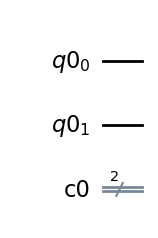

In [ ]:
qc.draw('mpl')

All qubits are initialized in |0>. In the Bloch sphere representation, this is the north pole. This is a 2-qubit system, so there should be two Bloch spheres, one for each qubit -- both of them pointing to the north pole.

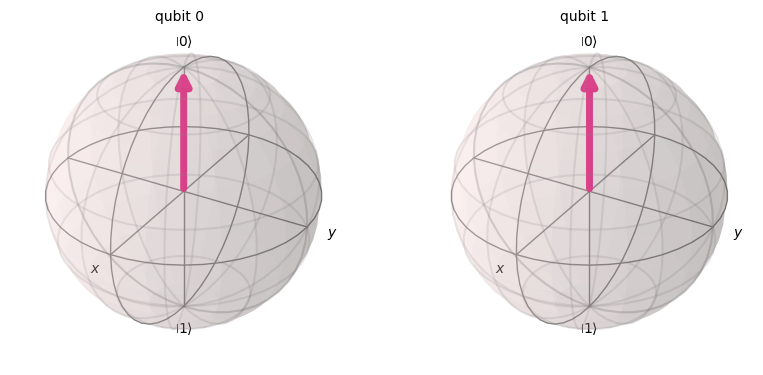

In [ ]:
plot_bloch_multivector(qc)

Let us now measure the qubits. Since the qubits are in state |00>, the outcome should be 00 itself with probability 1.

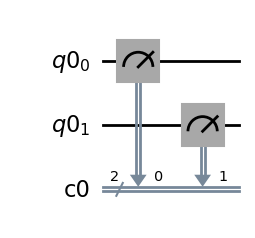

In [ ]:
qc.measure(qr,cr)
qc.draw('mpl')

Let's create a bell state $\ket{\Phi^+}$

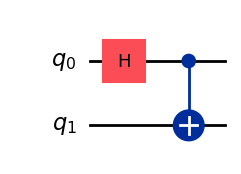

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw('mpl')

Let us verify our notion using Bloch sphere.

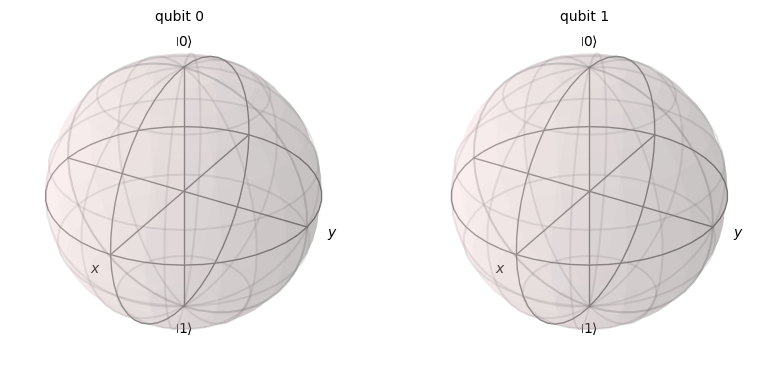

In [ ]:
plot_bloch_multivector(qc)

When we measure these two qubits, the first qubit should collapse to 1, and the second to 0, with probability 1.

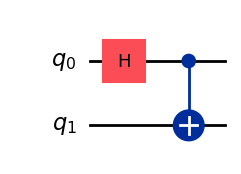

In [ ]:
qc.draw('mpl')

In [ ]:
from qiskit_aer import StatevectorSimulator

simulator = StatevectorSimulator()

result = simulator.run(qc).result()
sv = result.get_statevector()
print(sv)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


To simulate the same circuit using shot based simulater, we will use QASM simulator

In [ ]:
simulator = Aer.get_backend("qasm_simulator")
# qc.measure_all()
result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)

{'11': 525, '00': 499}


### Try out questions
Let's build some circuits and get our hands dirty.

Q1. Let's create all the bell states $\ket{\Phi^+}, \ket{\Phi^-}, \ket{\Psi^+}, \ket{\Psi^-}$

In [ ]:
simulator = Aer.get_backend("statevector_simulator")

NameError: name 'Aer' is not defined

In [ ]:
phi_plus = QuantumCircuit(2) # Implement your circuit here
phi_plus.h(0)
phi_plus.cx(0,1)

result = simulator.run(phi_plus).result()
sv = result.get_statevector()

assert np.allclose(sv.data,[1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [ ]:
phi_minus = QuantumCircuit(2) # Implement your circuit here
phi_minus.x(0)
phi_minus.h(0)
phi_minus.cx(0,1)

result = simulator.run(phi_minus).result()
sv = result.get_statevector()
assert np.allclose(sv.data,[1/np.sqrt(2), 0, 0, -1/np.sqrt(2)])

In [ ]:
psi_plus = QuantumCircuit(2) # Implement your circuit here
psi_plus.h(0)
psi_plus.x(1)
psi_plus.cx(0,1)

result = simulator.run(psi_plus).result()
sv = result.get_statevector()
assert np.allclose(sv.data,[0, 1/np.sqrt(2), 1/np.sqrt(2), 0])

Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))


In [ ]:
psi_minus = QuantumCircuit(2) # Implement your circuit here
psi_minus.x(0)
psi_minus.h(0)
psi_minus.x(1)

psi_minus.cx(0,1)

result = simulator.run(psi_minus).result()
sv = result.get_statevector()
assert np.allclose(sv.data,[0, -1/np.sqrt(2), 1/np.sqrt(2), 0])

Statevector([ 0.        +0.00000000e+00j, -0.70710678+8.65956056e-17j,
              0.70710678-8.65956056e-17j,  0.        +0.00000000e+00j],
            dims=(2, 2))


Q2. Let's implement logic gates using quantum circuits

In [ ]:
simulator = Aer.get_backend("qasm_simulator")

In [ ]:
not_gate = QuantumCircuit(1)
not_gate.x(0)
not_gate.measure_all()

result = simulator.run(not_gate).result()
counts = result.get_counts()
print(counts)


{'1': 1024}


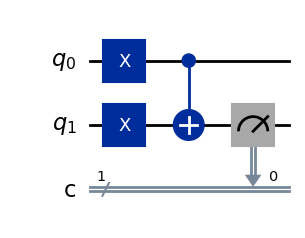

In [ ]:
xor_gate = QuantumCircuit(2,1)
xor_gate.x(0)
xor_gate.x(1)
xor_gate.cx(0,1)
xor_gate.measure(1,0)
xor_gate.draw("mpl")

In [ ]:
result = simulator.run(xor_gate).result()
counts = result.get_counts()
print(counts)

{'0': 1024}


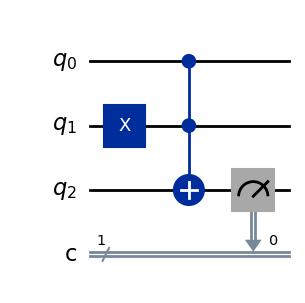

In [ ]:
and_gate =  QuantumCircuit(3,1)
# and_gate.x(0)
and_gate.x(1)
and_gate.ccx(0,1,2)
and_gate.measure(2,0)
and_gate.draw("mpl")

In [ ]:
result = simulator.run(and_gate).result()
counts = result.get_counts()
print(counts)

{'0': 1024}


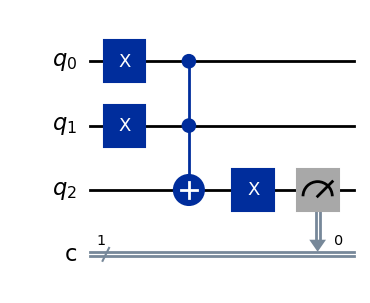

In [ ]:
or_gate = QuantumCircuit(3,1)
# or_gate.x(0)
# or_gate.x(1)
or_gate.x(0)
or_gate.x(1)
or_gate.ccx(0,1,2)
or_gate.x(2)
or_gate.measure(2,0)
or_gate.draw("mpl")

In [ ]:
result = simulator.run(or_gate).result()
counts = result.get_counts()
print(counts)

{'1': 1024}


Q3. Implement GHZ state $\frac{1}{\sqrt{2}}(\ket{000} + \ket{111})$

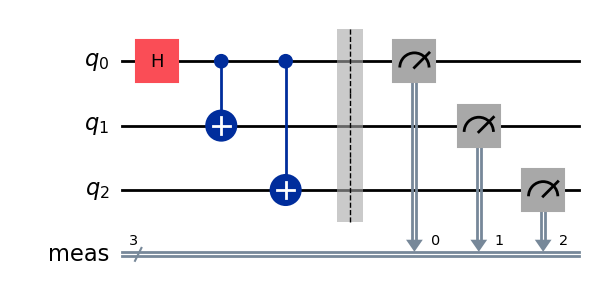

In [ ]:
ghz =  QuantumCircuit(3)
ghz.h(0)
ghz.cx(0,1)
ghz.cx(0,2) # Implement your circuit here
ghz.measure_all()
ghz.draw("mpl")

Q4. Implement W state $\frac{1}{\sqrt{3}}(\ket{001} + \ket{010} + \ket{100})$

In [1]:
w_state =  None # Implement your circuit here

Q5. Design a Quantum Circuit which corresponds to this statevector

In [ ]:
required_sv = [ 0+0j, 0+0j, 0.707+0j, 0+0j, 0.707+0j, 0+0j, 0+0j, 0+0j ]
qc = None # Implement your circuit here


simulator = Aer.get_backend("statevector_simulator")
result = simulator.run(qc).result()
sv = result.get_statevector().data
assert sv == required_sv